In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

<AxesSubplot: >

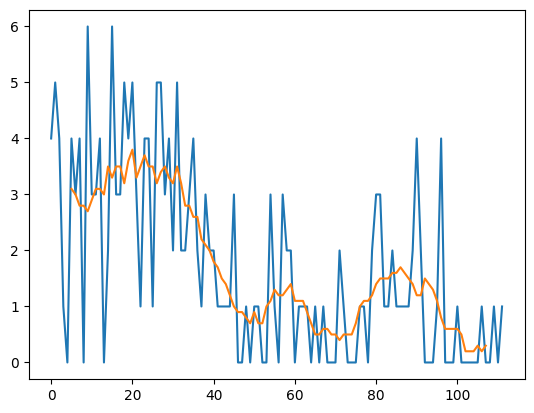

In [2]:
usines = open("acc_usines.txt", "r")
usines = usines.read().split("\n")
usines = pd.Series([int(i) for i in usines])
T = len(usines)
usines.plot()
usines.rolling(window = 10, center = True).mean().plot()

In [3]:
def loi_lambda(usines, Delta, Gamma):
    elements = list(range(1,T+1))
    probas = [np.exp(-i*Gamma-(T-i)*Delta)*Gamma**(sum(usines[:i]))*Delta**(sum(usines[i:])) for i in elements]
    probas /= sum(probas) #On normalise la liste des probabilités
    return np.random.choice(elements, p=probas) #On tire un lambda en suivant les probabilités calculées ici

def loi_y(Lambda, Delta, Gamma, t):
    if t<= Lambda:
        return np.random.poisson(Gamma)
    else:
        return np.random.poisson(Delta)

In [4]:
a1, a2, d1, d2 = np.random.randint(1, 10, 4)

Gamma = np.random.gamma(a1,a2)
Delta = np.random.gamma(d1,d2)
Lambda = np.random.randint(1,T)

In [5]:
n_iter = 200
Liste_Lambda = [Lambda]
Liste_Delta = [Delta]
Liste_Gamma = [Gamma]

for i in tqdm(range(n_iter)):
    
    a1 = a1 + usines[:Lambda+1].sum()
    a2 = a2/(Lambda*a2+1)
    
    d1 = d1+ usines[Lambda+1:].sum()
    d2 = d2/((T-Lambda)*d2+1)
    
    Gamma = np.random.gamma(a1, a2)
    Liste_Gamma.append(Gamma)
    Delta = np.random.gamma(d1, d2)
    Liste_Delta.append(Delta)
    Lambda = loi_lambda(usines, Delta, Gamma)
    Liste_Lambda.append(Lambda)
    

100%|██████████| 200/200 [00:01<00:00, 118.95it/s]


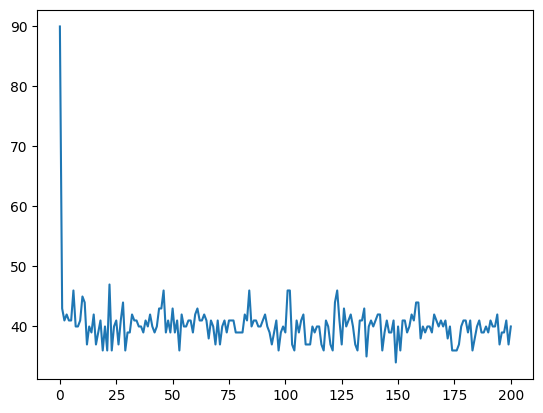

In [6]:
plt.plot(Liste_Lambda)

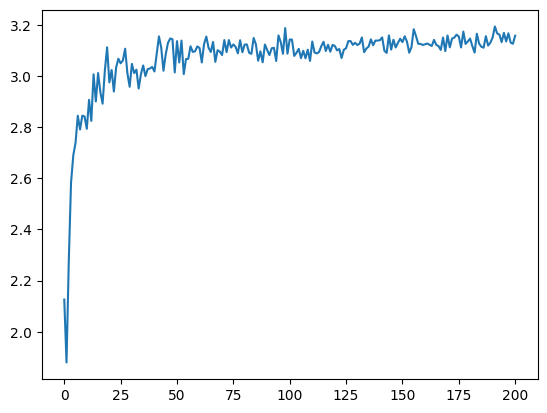

In [7]:
plt.plot(Liste_Gamma)

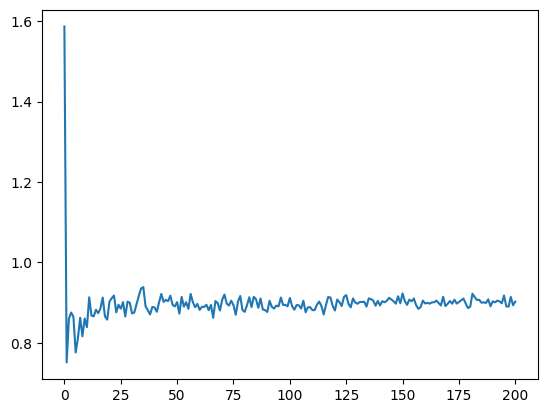

In [8]:
plt.plot(Liste_Delta)

On voit sur les graphiques que les valeurs convergent très rapidement, semblant stationnaires au bout d'une dizaine d'itérations. Pour être certains, on prend un phase de burn-in de 100 étapes, et on calcule les valeurs finales sur les 100 dernières itérations.

In [9]:
print("La moyenne à posteriori de Lambda est de", round(np.mean(Liste_Lambda[100:]), 3))
print("L'écart-type de cette valeur est de", round(np.std(Liste_Lambda[100:]), 3))

La moyenne à posteriori de Lambda est de 39.683
L'écart-type de cette valeur est de 2.359


In [ ]:
print("Avant le point de changement, on prédit en moyenne", round(np.mean(Liste_Gamma[100:]), 3), "accidents par an")
print("Après le point de changement, ce taux passe à environ", round(np.mean(Liste_Delta[100:]), 3), "accidents par an")

On voit que ce point de changement a amélioré la sécurité dans cette usine, réduisant le nombre d'accidents par un facteur de plus de 3.